# Terrain Vertical Displacement - Template Matching (Non-Scaled)

In [ ]:
%%javascript
/* 
 * Force prevention of output scroll toggle.
 * Original source: https://github.com/ipython/ipython/issues/2172#issuecomment-53708976 
 */
IPython.OutputArea.auto_scroll_threshold = 9999;

### Test 1: Flat (10cm)

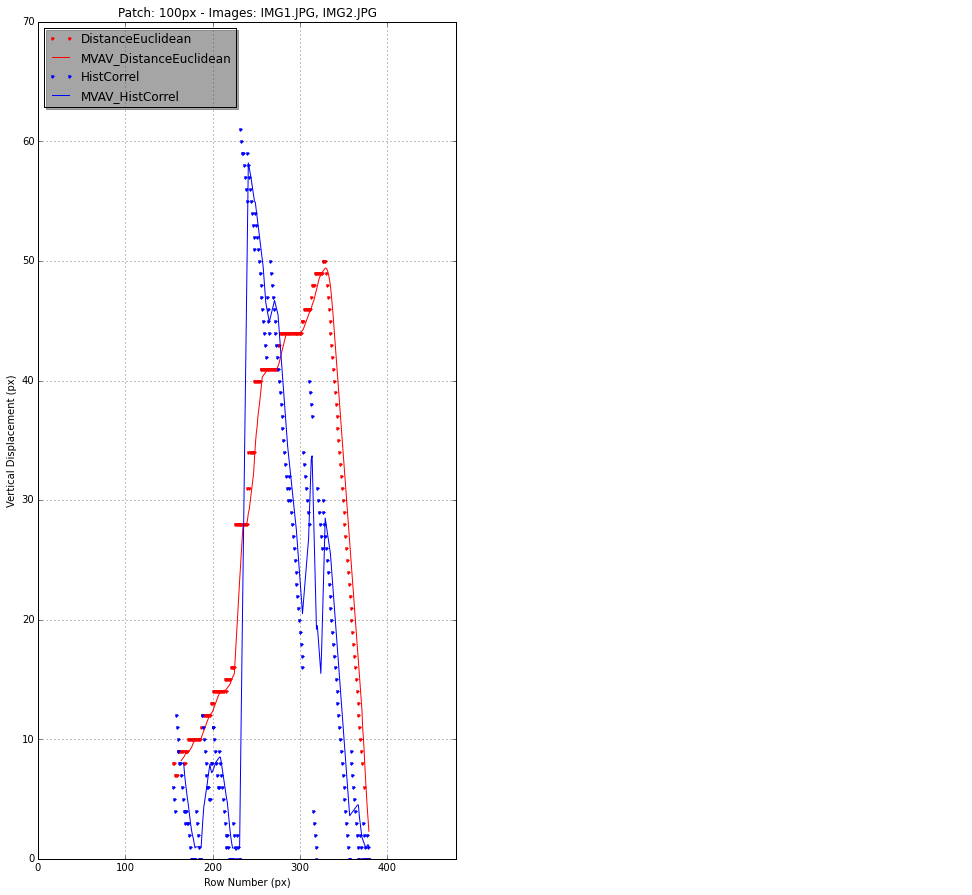

[[<tse.tse_result.TSEResult instance at 0x10ff2fa70>, <tse.tse_result.TSEResult instance at 0x1126c9098>, <tse.tse_result.TSEResult instance at 0x1126c9bd8>, <tse.tse_result.TSEResult instance at 0x10ff2f9e0>, <tse.tse_result.TSEResult instance at 0x10ff43950>, <tse.tse_result.TSEResult instance at 0x10ff431b8>, <tse.tse_result.TSEResult instance at 0x10ff43050>, <tse.tse_result.TSEResult instance at 0x10ff43998>, <tse.tse_result.TSEResult instance at 0x10ff438c0>, <tse.tse_result.TSEResult instance at 0x10ff437a0>, <tse.tse_result.TSEResult instance at 0x10ff43128>, <tse.tse_result.TSEResult instance at 0x10ff43c20>, <tse.tse_result.TSEResult instance at 0x10ff43b00>, <tse.tse_result.TSEResult instance at 0x10ff43b48>, <tse.tse_result.TSEResult instance at 0x10ff43a28>, <tse.tse_result.TSEResult instance at 0x10ff43a70>, <tse.tse_result.TSEResult instance at 0x10ff43908>, <tse.tse_result.TSEResult instance at 0x10ff437e8>, <tse.tse_result.TSEResult instance at 0x10ff43830>, <tse.tse_r

In [11]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16.5, 15.0)

# We have to add a reference to the parent folder in order to access the modules.
import sys,os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import template_matching_scaling as templ
import matplotlib.pyplot as plt
import cv2

from tse.tse_matchmethod import tse_match_methods
from tse.tse_matchtype import TSEMatchType

config_file = "../../perspective_calibration/data/calibdata_23_03_15_11_07_04.txt"

image_pairs = [("../../eval_data/motion_images/flat_10cm/IMG1.JPG", "../../eval_data/motion_images/flat_10cm/IMG2.JPG")]

patch_sizes = [100]

match_method1 = TSEMatchType("DistanceEuclidean", tse_match_methods.DISTANCE_ED, None, "r", reverse_score=True)
# match_method2 = TSEMatchType("HistCorrel", tse_match_methods.HIST, cv2.cv.CV_COMP_CORREL, "b")
# match_method3 = TSEMatchType("HistChiSqr", tse_match_methods.HIST, cv2.cv.CV_COMP_CHISQR, "g", reverse_score=True)
match_method4 = TSEMatchType("DistanceCorr", tse_match_methods.DISTANCE, cv2.cv.CV_TM_CCORR_NORMED, "y")

match_methods = [match_method1, match_method4]

results = templ.start_tests(image_pairs, patch_sizes, match_methods, config_file, use_scaling=False, plot_results=True)

print results

for i in range(len(results)):
#     for j in range(len(results[i])): 
    for p in results[i]: print p.to_tuple()
#     print results[i]

### Test 2: Wiltshire Outside (10cm)

In [ ]:
import template_matching_scaling as match

import matplotlib.pyplot as plt
import cv2

from tse.tse_matchmethod import tse_match_methods
from tse.tse_matchtype import TSEMatchType

image_path = "../../eval_data/motion_images/wiltshire_outside_10cm/"

config_file = "../../perspective_calibration/data/calibdata_23_03_15_11_07_04.txt"

image_pairs = [("IMG1.JPG", "IMG2.JPG"), ("IMG3.JPG", "IMG4.JPG"), ("IMG5.JPG", "IMG6.JPG"), ("IMG7.JPG", "IMG8.JPG")]

patch_sizes = [50, 100, 200]

match_method1 = TSEMatchType("DistanceEuclidean", tse_match_methods.DISTANCE_ED, None, "r", reverse_score=True)
match_method2 = TSEMatchType("HistCorrel", tse_match_methods.HIST, cv2.cv.CV_COMP_CORREL, "b")
match_method3 = TSEMatchType("HistChiSqr", tse_match_methods.HIST, cv2.cv.CV_COMP_CHISQR, "g", reverse_score=True)
match_method4 = TSEMatchType("DistanceCorr", tse_match_methods.DISTANCE, cv2.cv.CV_TM_CCORR_NORMED, "y")

match_methods = [match_method1, match_method2, match_method3, match_method4]

match.start_tests(image_path, image_pairs, patch_sizes, match_methods, config_file, use_scaling=False)